[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

ROC_AUC Score 0.7805243158039805


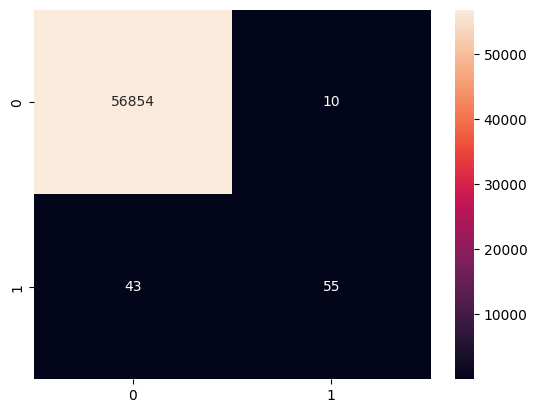

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/creditcard.csv')

# features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize model
model = LogisticRegression()

# model training
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score", roc_auc)

# plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()